# Ch05. Regression

### 5.4 보스턴 주택 가격 예측

In [49]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [50]:
from scipy import stats
from sklearn.datasets import load_boston

In [51]:
boston = load_boston()

In [52]:
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


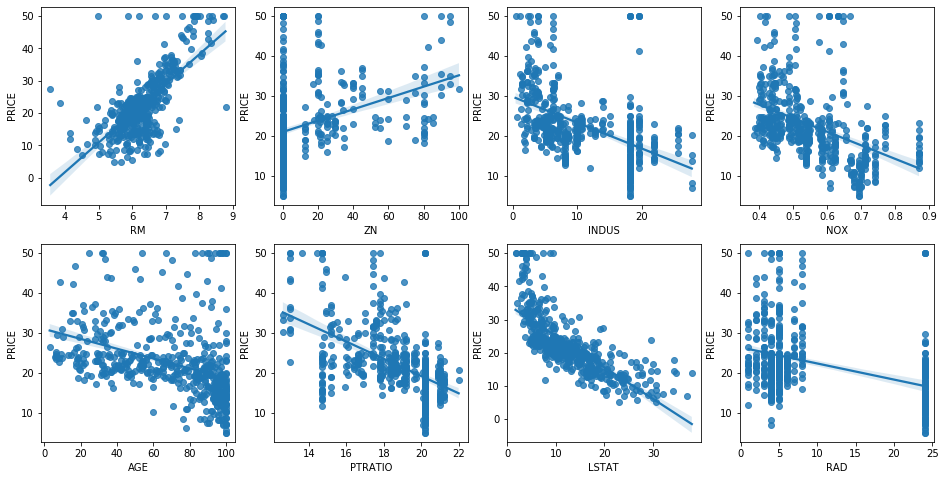

In [53]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
im_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(im_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [54]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [55]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [56]:
x = bostonDF['RM']
y = boston.target

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)

In [1]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [59]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [60]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

- 결과 확인하기

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1795128921483402

- 계수 w(weight), 절편  b(bias)

In [62]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식 PRICE = 9.99 * RM - 40.09

- 산점도, 회귀선 그리기

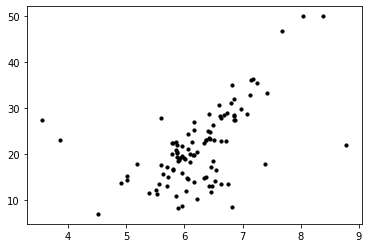

In [63]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [64]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

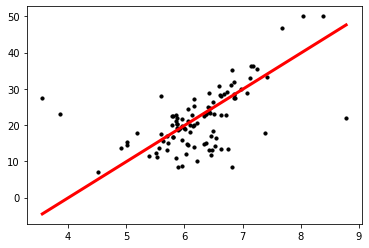

In [65]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [66]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = [4,8]
y1 = 4 * w + b
y2 = 8 * w + b

In [67]:
# w = sim_lr.coef_[0]
# b = sim_lr.intercept_
# xs = np.array([4,8])
# ys = xs * w +b

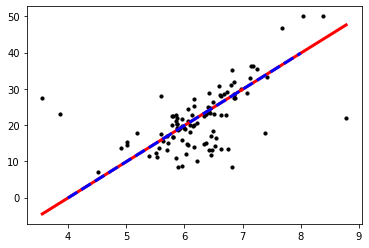

In [68]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, [y1,y2], c='blue', lw=3, ls='--')
plt.show()

In [100]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


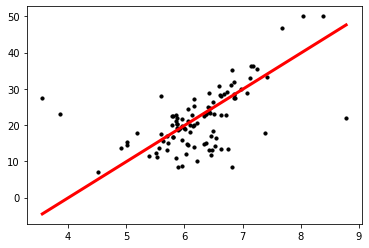

In [70]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [71]:
xx = bostonDF['PRICE']
yy = boston.target

In [72]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=19)

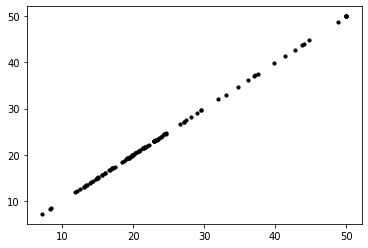

In [73]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [74]:
line_xx = np.linspace(np.min(x_test), np.max(x_test), 10)
line_yy = sim_lr.predict(line_xx.reshape(-1,1))

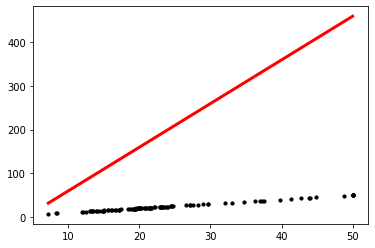

In [75]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_xx, line_yy, c='red', lw=3)
plt.show()

In [76]:
xxx = bostonDF['PRICE']
yyy =  bostonDF['LSTAT']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2, random_state=19)

In [78]:
# from sklearn.linear_model import LinearRegression
# sim_lr = LinearRegression()

In [79]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5137721019625436

In [82]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.61191726]), 26.3417822280161)

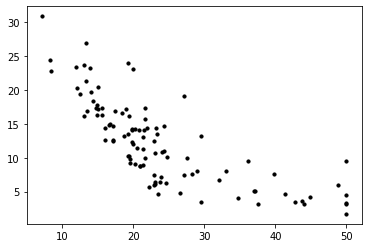

In [83]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [84]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

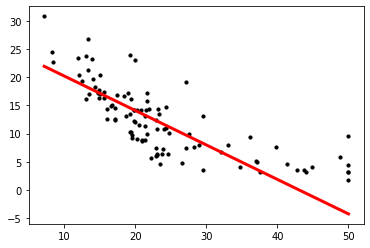

In [85]:
plt.scatter(x_test, y_test, s=10, c='k')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

### Decision Tree regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
dt_regr.fit(x_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [89]:
y_pred_dt = dt_regr.predict(x_test.values.reshape(-1,1))

In [90]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [91]:
rmse

3.669052081135362

In [92]:
from sklearn.svm import SVR
svr_rege = SVR()

In [93]:
svr_rege.fit(x_train.values.reshape(-1,1), y_train)
y_pred_svm = svr_rege.predict(x_test.values.reshape(-1,1))
rmse_svm = np.round(np.sqrt(mean_squared_error(y_test, y_pred_svm)), 2)

In [94]:
print(rmse_svm, rmse_lr)

3.48 4.31


### 1. Liner Regression

In [95]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = slr.predict(x_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

## 다중 회귀

In [101]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [145]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [105]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [107]:
print('절편 값 :', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 : 40.995595172164336
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [112]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [114]:
from sklearn.model_selection import cross_val_score

In [120]:
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'. format(avg_rmse))



5 folds 의 개별 Negative MSE scores : [-12.46  -26.049 -33.074 -80.762 -33.314]
5 folds 의 개별 RMSE scores :  [3.53  5.104 5.751 8.987 5.772]
5 folds 의 평균 RMSE : 5.829


### 다항 회귀

In [137]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x = bostonDF['LSTAT']
y = boston.target
pf = poly.fit_transform(x.values.reshape(-1,1))

In [138]:
pf.shape

(506, 3)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
pf_train = poly.fit_transform(x_train.values.reshape(-1,1))
pf_test = poly.fit_transform(x_test.values.reshape(-1,1))

In [154]:
lr =  LinearRegression()
lr.fit(pf_train, y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse

5.34

In [155]:
lr.coef_

array([ 0.        , -2.47262189,  0.04716606])

In [156]:
lr.intercept_

44.01462657247066

ValueError: x and y must be the same size

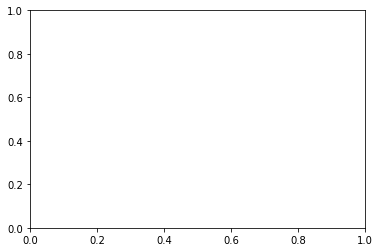

In [222]:
xs = np.linspace(0,31,100)
line_x = poly.fit_transform(xs.reshape(-1,1))
line_y = lr.predict(line_x)
plt.scatter(x_test, y_test, s=10, c='k')
plt.plot(line_x, line_y, c='red', lw=3)
plt.xlim(0,31)
plt.xlabel('LSTAT')
plt.show()

### 5.6 - 규제 선형 모델

In [163]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [165]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [170]:
alphas = [0,0.2,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'. format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.2 일 때 5 folds 의 평균 RMSE : 5.758
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


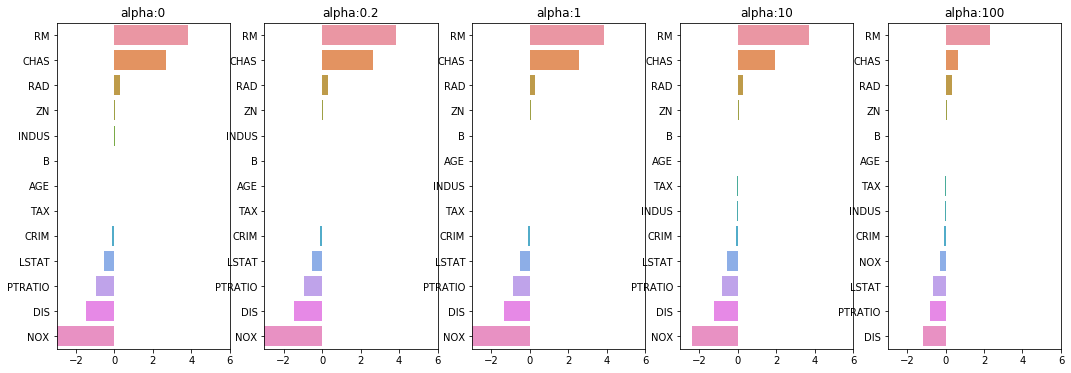

In [174]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

### 5.7 로지스틱 회귀

### w값과 b값에 따른 시그모이드 함수의 변화

In [181]:
import numpy

In [182]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*x+b)))

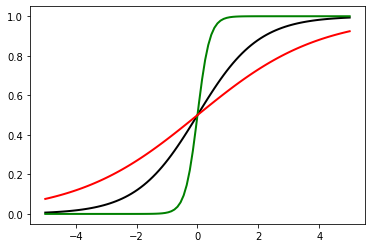

In [188]:
xs = np.linspace(-5, 5,100)
y1 = sigmoid(xs, 1,0)
y5 = sigmoid(xs,5,0)
y05 = sigmoid(xs,0.5,0)
plt.plot(xs, y1,lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y05, lw=2, c='r')
plt.show()

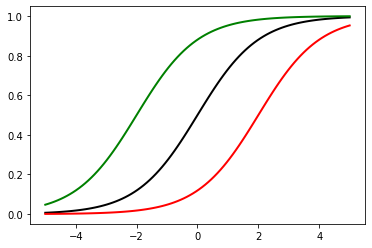

In [192]:
xs = np.linspace(-5, 5,100)
y0 = sigmoid(xs, 1,0)
y2p = sigmoid(xs,1,2)
y2m = sigmoid(xs,1,-2)
plt.plot(xs, y0,lw=2, c='k')
plt.plot(xs, y2p, lw=2, c='g')
plt.plot(xs, y2m, lw=2, c='r')
plt.show()

In [194]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled,cancer.target, test_size=0.3, random_state=0)

In [197]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [203]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

print('accuracy : {:0.3f}'. format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc : 0.972


In [211]:
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l2', 'l1'], 'c' : [0.01, 0.1, 1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

ValueError: Invalid parameter c for estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [245]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [209]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores : [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores : [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420


In [213]:
def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores=cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [224]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

In [225]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, x_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.420
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269
[13:20:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646


In [226]:
import seaborn as sns
%matplotlib inline

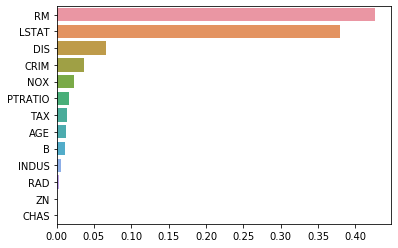

In [227]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_data, y_target)

feature_serises = pd.Series(data=rf_reg.feature_importances_, index=x_data.columns)
feature_serises = feature_serises.sort_values(ascending=False)
sns.barplot(x=feature_serises, y=feature_serises.index)

(100, 2)


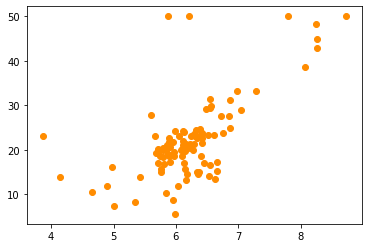

In [229]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [232]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

x_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)
x_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(x_feature, y_target)
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_lr = lr_reg.predict(x_test)
pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

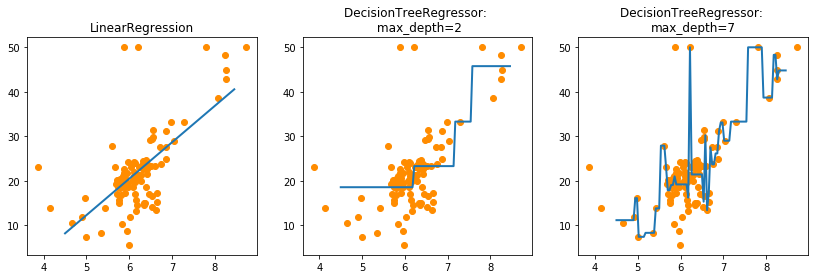

In [237]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('LinearRegression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(x_test, pred_lr, label="linear", linewidth=2)

ax2.set_title('DecisionTreeRegressor: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(x_test, pred_rf2, label="max_depth:3", linewidth=2)

ax3.set_title('DecisionTreeRegressor: \nmax_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(x_test, pred_rf7, label="max_depth:7", linewidth=2)

In [253]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('data/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [254]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [255]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [251]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)